In [2]:
import json
import re
import random
import pickle as p
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
f = open('../Data/fbdata.json', "r")

In [4]:
fb_corpus = json.load(f)

In [5]:
# postprocess the people's name so that its just name
for key, val in fb_corpus.iteritems():
    user_name = val.get(u'name')
    user_name = re.match("\"(.*)\"@en", user_name).group(1)
    val[u'name'] = user_name

In [6]:
# calculate a score for each person
person_score = []
for key, entry in fb_corpus.iteritems():
    score = 0
    for slot, slot_val in entry.iteritems():
        if slot == 'birthday' and slot_val:
            score += int(slot_val[0][0:3]) / 1000.0
        else:
            if type(slot_val) is list:
                score += min(len(slot_val), 1)
    person_score.append((score, key))

In [7]:
len(person_score)

3300540

In [8]:
ranked_persons = sorted(person_score, reverse=True)

In [9]:
idx = 5
print fb_corpus.get(ranked_persons[idx][1])
print ranked_persons[idx]

{u'birthplace': [u'The Bronx'], u'spouse': [u'Greg Giraldo', u'Greg Giraldo', u'Maryann Giraldo'], u'name': u'Greg Giraldo', u'degree': [u'Law degree', u"Bachelor's degree"], u'gender': [u'Male'], u'profession': [u'Comedian', u'Stand-up comedian', u'Screenwriter', u'Lawyer', u'Film Producer', u'Actor'], u'birthday': [u'965-12-10'], u'deathplace': [u'New Brunswick'], u'nationality': [u'United States of America'], u'education': [u'Harvard Law School', u'Harvard University', u'Regis High School', u'Columbia University'], u'Types': [u'music.artist', u'tv.tv_actor', u'internet.social_network_user', u'people.person', u'music.group_member', u'film.person_or_entity_appearing_in_film', u'influence.influence_node', u'people.deceased_person', u'award.award_nominee', u'film.actor', u'tv.tv_personality']}
(9.965, u'm.03f1sjy')


In [10]:
# print top N name
N = 1000
for score, key in ranked_persons[0:N]:
    print (fb_corpus.get(key).get('name'), fb_corpus.get(key).get('birthday'))

(u'Selena', [u'971-04-16'])
(u'Lisa Robin Kelly', [u'970-03-05'])
(u"Patrice O'Neal", [u'969-12-07'])
(u'Philip Seymour Hoffman', [u'967-07-23'])
(u'Vince Flynn', [u'966-04-06'])
(u'Greg Giraldo', [u'965-12-10'])
(u'Christopher Evan Welch', [u'965-09-28'])
(u'George Hickenlooper', [u'963-05-25'])
(u'Daniel Pearl', [u'963-10-10'])
(u'David Foster Wallace', [u'962-02-21'])
(u'Nicholas Hughes', [u'962-01-17'])
(u'Kalpana Chawla', [u'962-03-17'])
(u'James Gandolfini', [u'961-09-18'])
(u'Richard Biggs', [u'960-03-18'])
(u'Michael P. Anderson', [u'959-12-25'])
(u'Yasmin Ahmad', [u'958-01-07'])
(u'Rick Husband', [u'957-07-12'])
(u'Apichart Choosakul', [u'956'])
(u'Murali', [u'954-05-25'])
(u'David Taylor', [u'954-03-14'])
(u'Ilan Ramon', [u'954-06-20'])
(u'Kvitka Cisyk', [u'953-04-04'])
(u'Benazir Bhutto', [u'953-06-21'])
(u'Suhardi', [u'952-08-13'])
(u'Mark Lapore', [u'952'])
(u'Wang Xiaobo', [u'952-05-13'])
(u'Douglas Adams', [u'952-03-11'])
(u'Zoran \u0110in\u0111i\u0107', [u'952-08-01'])


In [11]:
# create a corpus of the top N person in the freebase
random.seed(1)
top_n = 100
top_list = [key for score, key in ranked_persons[0:top_n*100]]
selected_list = random.sample(top_list, top_n)
top_fb_corpus = {}

for key in selected_list:
    val = fb_corpus.get(key)
    top_fb_corpus[key] = val
print len(top_fb_corpus)

100


Analysis the top N people a little bit

In [12]:
def analysis(top_fb_corpus):
    # get all the fileds
    field_set = set()
    field_count = {}
    field_modality = {}
    empty_cnt = {}
    for person_key, person_attributes in top_fb_corpus.iteritems():
        for field, content in person_attributes.iteritems():
            # update count and update modality
            moda = field_modality.get(field, {})
            cnt = field_count.get(field, 0)
            emptyCnt = empty_cnt.get(field,0)
            if type(content) is list:
                cnt += len(content)
                for c in content:
                    moda_cnt = moda.get(c, 0)
                    moda[c] = moda_cnt + 1
                if len(content) == 0:
                    emptyCnt += 1
            else:
                cnt += 1
                moda_cnt = moda.get(content, 0)
                moda[content] = moda_cnt + 1

            # save
            field_set.add(field)  
            field_count[field] = cnt
            field_modality[field] = moda
            empty_cnt[field] = emptyCnt
    print str(len(field_set)) + ' unique fileds'
    print 'Average number'
    print [(k, v/float(len(top_fb_corpus))) for k, v in field_count.iteritems()]
    print 'Total value'
    print [(k, len(v)) for k, v in field_modality.iteritems()]
    print 'Empty'
    print [(k, v/float(len(top_fb_corpus))) for k, v in empty_cnt.iteritems()]
    return field_count, field_modality, empty_cnt

In [13]:
(field_count, field_modality, empty_cnt) = analysis(top_fb_corpus)

11 unique fileds
Average number
[(u'birthplace', 1.0), (u'education', 1.96), (u'name', 1.0), (u'degree', 0.63), (u'gender', 1.0), (u'profession', 2.39), (u'birthday', 1.0), (u'deathplace', 0.77), (u'nationality', 1.09), (u'spouse', 2.73), (u'Types', 7.2)]
Total value
[(u'birthplace', 88), (u'education', 149), (u'name', 100), (u'degree', 24), (u'gender', 2), (u'profession', 74), (u'birthday', 100), (u'deathplace', 62), (u'nationality', 30), (u'spouse', 220), (u'Types', 90)]
Empty
[(u'birthplace', 0.0), (u'education', 0.0), (u'name', 0.0), (u'degree', 0.51), (u'gender', 0.0), (u'profession', 0.0), (u'birthday', 0.0), (u'deathplace', 0.23), (u'nationality', 0.0), (u'spouse', 0.15), (u'Types', 0.0)]


save the top_corpus

In [105]:
json.dump(top_fb_corpus, open('../Data/top100.json', 'w'))

[u'934-05-09', u'891-01-07', u'930-01-19', u'922-09-08', u'938-08-07', u'916-03-12', u'946-12-19', u'921-10-16', u'929-02-28', u'917-09-04', u'939-08-30', u'952-08-21', u'934-04-07', u'930-07-01', u'930-04-09', u'975-07-03', u'938-08-19', u'943-12-17', u'958-03-25', u'920-12-13', u'913-09-03', u'922-02-26', u'914-02-26', u'926-06-23', u'935-06-13', u'918-05-27', u'969-12-24', u'927-07-03', u'936-05-07', u'910-10-10', u'931-03-15', u'936-03-28', u'914-01-15', u'917-03-31', u'933-08-30', u'905-09-07', u'913-03-29', u'926-06-10', u'953-04-15', u'953-03-01', u'911-01-15', u'918-06-19', u'904-05-10', u'921-03-16', u'931-01-09', u'921-07-01', u'917-03-01', u'953-10-27', u'953-08-15', u'931-07-11', u'914-05-31', u'923-09-01', u'919-02-10', u'916-09-17', u'953-04-04', u'954-06-07', u'918-11-03', u'920-06-11', u'907-04-21', u'933-06-06', u'912-10-21', u'917-08-22', u'930-07-27', u'928-10-03', u'926-01-13', u'940-07-15', u'947-06-15', u'908-11-16', u'927-09-27', u'960-07-27', u'924-12-12', u'921

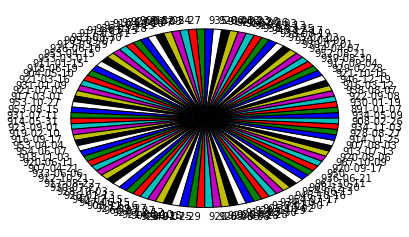

In [15]:
data = field_modality.get(u'birthday')
plt.pie(data.values(), labels=data.keys())
print data.keys()

### Another approach from http://www.biographyonline.net/people/famous-100.html

In [50]:
f = open('../Data/famousPeople', "r")
lines = f.readlines()
big_names = []
big_birth = []
for l in lines:
    end = l.index('(')
    big_birth.append(l[end+1:end+5])
    big_names.append(l[0:end].strip().replace("\"", ""))
    

In [35]:
big_keys = []
for score, key in ranked_persons:
    name = fb_corpus.get(key).get('name')
    if name in big_names:
        big_keys.append(key)

In [ ]:
big_fb_corpus = {}
for key in big_keys:
    big_fb_corpus[key] = fb_corpus.get(key)
    print big_fb_corpus[key]

In [ ]:
analysis(big_fb_corpus) 

# Trying out different question for slots

In [32]:
field_count.keys()

[u'birthplace',
 u'education',
 u'name',
 u'degree',
 u'gender',
 u'profession',
 u'birthday',
 u'deathplace',
 u'nationality',
 u'spouse',
 u'Types']

100
[u'934-05-09', u'891-01-07', u'930-01-19', u'922-09-08', u'938-08-07', u'916-03-12', u'946-12-19', u'921-10-16', u'929-02-28', u'917-09-04', u'939-08-30', u'952-08-21', u'934-04-07', u'930-07-01', u'930-04-09', u'975-07-03', u'938-08-19', u'943-12-17', u'958-03-25', u'920-12-13', u'913-09-03', u'922-02-26', u'914-02-26', u'926-06-23', u'935-06-13', u'918-05-27', u'969-12-24', u'927-07-03', u'936-05-07', u'910-10-10', u'931-03-15', u'936-03-28', u'914-01-15', u'917-03-31', u'933-08-30', u'905-09-07', u'913-03-29', u'926-06-10', u'953-04-15', u'953-03-01', u'911-01-15', u'918-06-19', u'904-05-10', u'921-03-16', u'931-01-09', u'921-07-01', u'917-03-01', u'953-10-27', u'953-08-15', u'931-07-11', u'914-05-31', u'923-09-01', u'919-02-10', u'916-09-17', u'953-04-04', u'954-06-07', u'918-11-03', u'920-06-11', u'907-04-21', u'933-06-06', u'912-10-21', u'917-08-22', u'930-07-27', u'928-10-03', u'926-01-13', u'940-07-15', u'947-06-15', u'908-11-16', u'927-09-27', u'960-07-27', u'924-12-12', u

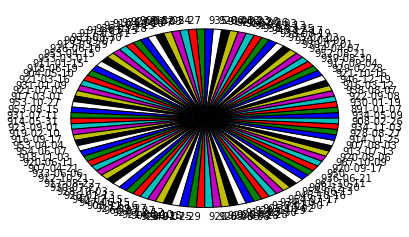

In [16]:
data = field_modality.get(u'birthday')
plt.pie(data.values(), labels=data.keys())
print len(data.keys())
print data.keys()

In [69]:
questions = []
question_sets = []

In [70]:
# gender
questions.append((u'gender', u'Is this person male?'))
question_sets.append(['Male'])
questions.append((u'gender', u'Is this person Female?'))
question_sets.append(['Female'])

In [71]:
# birthplace
# u'Dublin' -> ireland
# Heredia -> cost rosteca
questions.append((u'birthplace', u'Is this person born in USA east coast?'))
question_sets.append([u'Montgomery', u'Newark', u'Martinez', u'Shreveport',
                      u'Carbon Glow, Kentucky', u'Queens', u'Oakridge', u'East Orange', 
                      u'Iola', u'Medicine Lodge', u'Winchester', u'Prentice', 
                      u'New York City', u'United States of America', u'The Bronx', 
                      u'Boston', u'Wyomissing', u'Indianapolis', u'Brooklyn', 
                      u'Lincoln', u'Little Falls', u'Detroit', u'New Orleans', u'Snoqualmie Falls',
                      u'Notasulga', u'Jersey City', u'Baltimore', u'Houston', u'Philadelphia', 
                      u'Des Moines', u'Schenectady'])

questions.append((u'birthplace', u'Is this person born in USA west coast?'))
question_sets.append([u'Fitzgerald',u'San Francisco', u'Medicine Lodge', u'Winchester', u'Prentice', 
                      u'Los Angeles', u'Hot Springs', u'Kalihi', u'Emporia', u'Snoqualmie Falls'])

questions.append((u'birthplace', u'Is this person born in Canada?'))
question_sets.append([u'Walkerton', u'Sunderland', u'West St. Paul', u'Toronto', u'Iona Station, Ontario'])

questions.append((u'birthplace', u'Is this person born in west europe?'))
question_sets.append([u'Walkerton', u'Sunderland', u'West St. Paul', u'Athens',  u'Angri', 
                      u'Hampstead', u'Reggio Emilia', u'Hamburg', u'London', u'Southampton',
                      u'Tyldesley', u'Armley', u'Forest Hill, London',  u'Glanton', 
                      u'London Borough of Camden', u'Mill Hill', u'Manchester'])

questions.append((u'birthplace', u'Is this person born in east europe?'))
question_sets.append([u'Budapest', u'Valuysky District'])

questions.append((u'birthplace', u'Is this person born in north europe?'))
question_sets.append([u'Belfast', u'Nes aan de Amstel', u'Edinburgh', u'Fribourg', u'Schiedam', 
                      u'Dublin', u'Ullapool'])

questions.append((u'birthplace', u'Is this person born in middle east?'))
question_sets.append([u'Istanbul', u'Aleppo', u'Ankara', u'Memphis', u'Cairo'])

questions.append((u'birthplace', u'Is this person born in other parts?'))
question_sets.append([u'Manila', u'Port Said', u'Raipur', u'Bangkok', u'Sydney', 
                      u'Kolkata', u'Asakusa, Tokyo',u'Hong Kong', u'Kushiro', u'Ogwashi-Uku',
                      u'Belgrade', u'Riyadh', u'Red Rock', u'Serowe'])

questions.append((u'birthplace', u'Is this person born in south America?'))
question_sets.append([u'Mexico City', u'Arequipa', u'Heredia', u'Lima'])


In [72]:
# nationality
questions.append((u'nationality', u'Is this person a citizen of a country in Europe?'))
question_sets.append([u'Turkey', u'Italy',  u'Serbia', u'Scotland', u'Republic of Ireland', 
                      u'Germany', u'Spain',u'Netherlands',u'Northern Ireland',u'Hungary',
                      u'Switzerland',u'Soviet Union', u'England', u'United Kingdom', u'Greece'])

questions.append((u'nationality', u'Is this person a citizen of a country in Asia?'))
question_sets.append([u'Saudi Arabia', u'Thailand', u'Philippines', u'India', u'Japan'])

questions.append((u'nationality', u'Is this person a citizen of a country in America?'))
question_sets.append([u'Canada',  u'Costa Rica', u'Peru', u'United States of America', u'Mexico'])

questions.append((u'nationality', u'Is this person a citizen of a country in Africa?'))
question_sets.append([u'Nigeria', u'Egypt', u'Botswana', u'Syria'])

questions.append((u'nationality', u'Is this person a citizen of Australia?'))
question_sets.append([u'Australia'])

In [73]:
# degree
questions.append((u'degree', u'Does this person have degree before college?'))
question_sets.append([u'Associate degree', u'Secondary education'])

questions.append((u'degree', u'Does this person have bachelor degree?'))
question_sets.append([u'Bachelor of Business', u'Bachelor of Architecture', u'Bachelor of Laws',
                      u"Bachelor's degree", u'Bachelor of Science', u'Bachelor of Medicine, Bachelor of Surgery',
                      u'Bachelor of Economics', u'Bachelors in literature', 
                      u'Bachelor of Philosophy', u'Bachelor of Arts', u'Bachelor of Music'])

questions.append((u'degree', u'Does this person have master degree?'))
question_sets.append([u'Master of Economics', u"Master's Degree", u'Master of Public Administration', 
                      u'Master of Arts', u'MBA', u'Master of Urban Planning'])

questions.append((u'degree', u'Does this person have doctor degree?'))
question_sets.append([u'Law degree', u'Juris Doctor', u'Doctorate', u'PhD', u'Doctor of Medicine'])

In [74]:
# profession
questions.append((u'profession', u'Does this person work in entertainment industry?'))
question_sets.append([u'Film Editor', u'Television director', u'Theatrical producer',
                      u'Radio personality', u'Actor', u'Film Score Composer',
                      u'Theatre Director', u'Designer', u'Voice acting', 
                      u'Cinematographer', u'Film director', u'Television producer', u'Film Producer'])

questions.append((u'profession', u'Does this person a artist?'))
question_sets.append([u'Guitarist', u'Photographer',u'Violinist', u'Conductor', u'Poet', u'Music Director', u'Lyricist', 
                      u'Composer', u'Musician', u'Dancer', u'Sculptor', u'Songwriter', 
                      u'Singer', u'Artist', u'Visual Artist', u'Architect', u'Playwright'])

questions.append((u'profession', u'Is this person a scholar?'))
question_sets.append([u'Sociologist', u'Historian', u'Activist', u'Chemist', u'Physicist', u'Mathematician', u'Professor',
                      u'Anthropologist', u'Scientist', u'Economist'])

questions.append((u'profession', u'Is this persson related to sports?'))
question_sets.append([u'Baseball player', u'Horse trainer'])

questions.append((u'profession', u'Does this person make a living by writing?'))
question_sets.append([u'Author', u'Writer', u'Food critic', u'Commentator', u'Essayist', u'Translator', 
                      u'Screenwriter', u'Speechwriter', u'Lawyer', u'Barrister', u'Social Critic',
                      u'Presenter', u'Journalist', u'Film critic', u'Teacher', u'Literary critic', u'Novelist'])

questions.append((u'profession', u'Is this person related to medical domain?'))
question_sets.append([u'Physician', u'Medical Doctor', u'Surgeon'])

questions.append((u'profession', u'Is this person related to finance?'))
question_sets.append([u'Financier', u'Entrepreneur', u'Businessperson', u'Industrialist', u'Investor'])

questions.append((u'profession', u'Does this person have none of above profession?'))
question_sets.append([u'Army officer', u'Politician', u'Information systems technician',
                      u'Chef', u'Soldier', u'Astronaut', u'Democracy activist'])

In [75]:
# birthday
bd_values = field_modality.get(u'birthday').keys()
questions.append((u'birthday', u'Is this person born before 1950s?'))
x = [v for v in bd_values if int(v[0:2]) < 95]
print len(x)
question_sets.append(x)

questions.append((u'birthday', u'Is this person born before 1930s?'))
x = [v for v in bd_values if int(v[0:2]) < 93]
print len(x)
question_sets.append(x)

questions.append((u'birthday', u'Is this person born before 1910s?'))
x = [v for v in bd_values if int(v[0:2]) < 91]
print len(x)
question_sets.append(x)

84
57
10


In [76]:
# check all the questions set is correct
slot_names = [u'gender', u'nationality', u'degree', u'profession', 'birthday' ]
for slot in slot_names:
    expect_len = len(field_modality.get(slot).keys())
    actual_set = []
    for q, q_set in zip(questions, question_sets):
        if q[0] == slot:
            actual_set.extend(q_set)
    if len(actual_set) != expect_len:
        print [x for x in actual_set if actual_set.count(x) > 1]
        print (slot, expect_len, len(actual_set))
        print set(actual_set) -set(field_modality.get(slot).keys())
print len(questions)

[u'891-01-07', u'922-09-08', u'916-03-12', u'921-10-16', u'929-02-28', u'917-09-04', u'920-12-13', u'913-09-03', u'922-02-26', u'914-02-26', u'926-06-23', u'918-05-27', u'927-07-03', u'910-10-10', u'914-01-15', u'917-03-31', u'905-09-07', u'913-03-29', u'926-06-10', u'911-01-15', u'918-06-19', u'904-05-10', u'921-03-16', u'921-07-01', u'917-03-01', u'914-05-31', u'923-09-01', u'919-02-10', u'916-09-17', u'918-11-03', u'920-06-11', u'907-04-21', u'912-10-21', u'917-08-22', u'928-10-03', u'926-01-13', u'908-11-16', u'927-09-27', u'924-12-12', u'921-08-10', u'908-10-15', u'928-02-25', u'920-09-03', u'928-05-08', u'923-07-28', u'926-02-28', u'915-05-30', u'928-04-29', u'905-10-02', u'908-12-20', u'920-09-17', u'920-08-06', u'913-07-13', u'907-08-03', u'914-11-25', u'928-08-27', u'908-02-26', u'891-01-07', u'922-09-08', u'916-03-12', u'921-10-16', u'929-02-28', u'917-09-04', u'920-12-13', u'913-09-03', u'922-02-26', u'914-02-26', u'926-06-23', u'918-05-27', u'927-07-03', u'910-10-10', u'914

# save the questions

In [77]:
action_data = {'questions':questions, 'question_sets': question_sets}

In [78]:
p.dump(action_data, open('../Data/action_data.p', "w"))